In [88]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd

In [89]:
ctx = straxbra.XebraContext()

In [90]:
run = '00201'
peaks_data = ctx.get_array(run, 'peaks')

In [91]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
area_per_channel = peaks_data['area_per_channel']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]

In [92]:
def CutCondition(waveform):
    
    
    FirstPeak_area = sum(waveform[:15]) # range in samples (not ns!)
    SecondPeak_area = sum(waveform[15:]) # range in samples (not ns!)

    
    if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
#        print (i , secondS1_area, secondS1_peaktime)
        return(True)
    else:
        return(False)
    

In [93]:
def S2_found(integral, width):
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False

In [94]:
def Process(waveform, i):
    CutFlag = CutCondition(waveform[i])
    if CutFlag == True:
        Timestamps_kr_events.append(timestamp[i])
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 65000
        while threshold_timestamp >= counter_timestamp and S2_found(integral = integral[i+j], width = width[i+j]) == False: 
            j += 1
            counter_timestamp = timestamp[i+j]           
        else:
            if S2_found(integral = integral[i+j], width = width[i+j]):
                    #PrintWaveform(waveform[i+j])
                kr_s1_area.append(integral[i])
                kr_s1_width.append(integral[i])
                kr_s1_risetime.append(integral[i])
                kr_s2_area.append(integral[i+j])
                kr_s2_width.append(width[i+j])
                kr_s2_risetime.append(risetime[i+j])
                kr_s2_drifttime.append(counter_timestamp - timestamp[i])
                    
                return
            else:
                return

In [95]:
num = len(waveform)

kr_s1_area = []
kr_s1_width = []
kr_s1_risetime = []
kr_s2_area = []
kr_s2_width = []
kr_s2_risetime = []
kr_s2_drifttime = []
Timestamps_kr_events = []

print_counter = 0.0
for i in range(0,num):
    
    Process(waveform,i)
    
    if i/num >= print_counter:
        print(round(print_counter,2), end = ' ')
        print_counter += 0.1
        
print(1.0)

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0


In [96]:
S1_area = np.array(kr_s1_area)
S2_area = np.array(kr_s2_area)
S1_S2_ratio = S1_area/S2_area 

[1.04983878e-07 1.05217646e-01]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


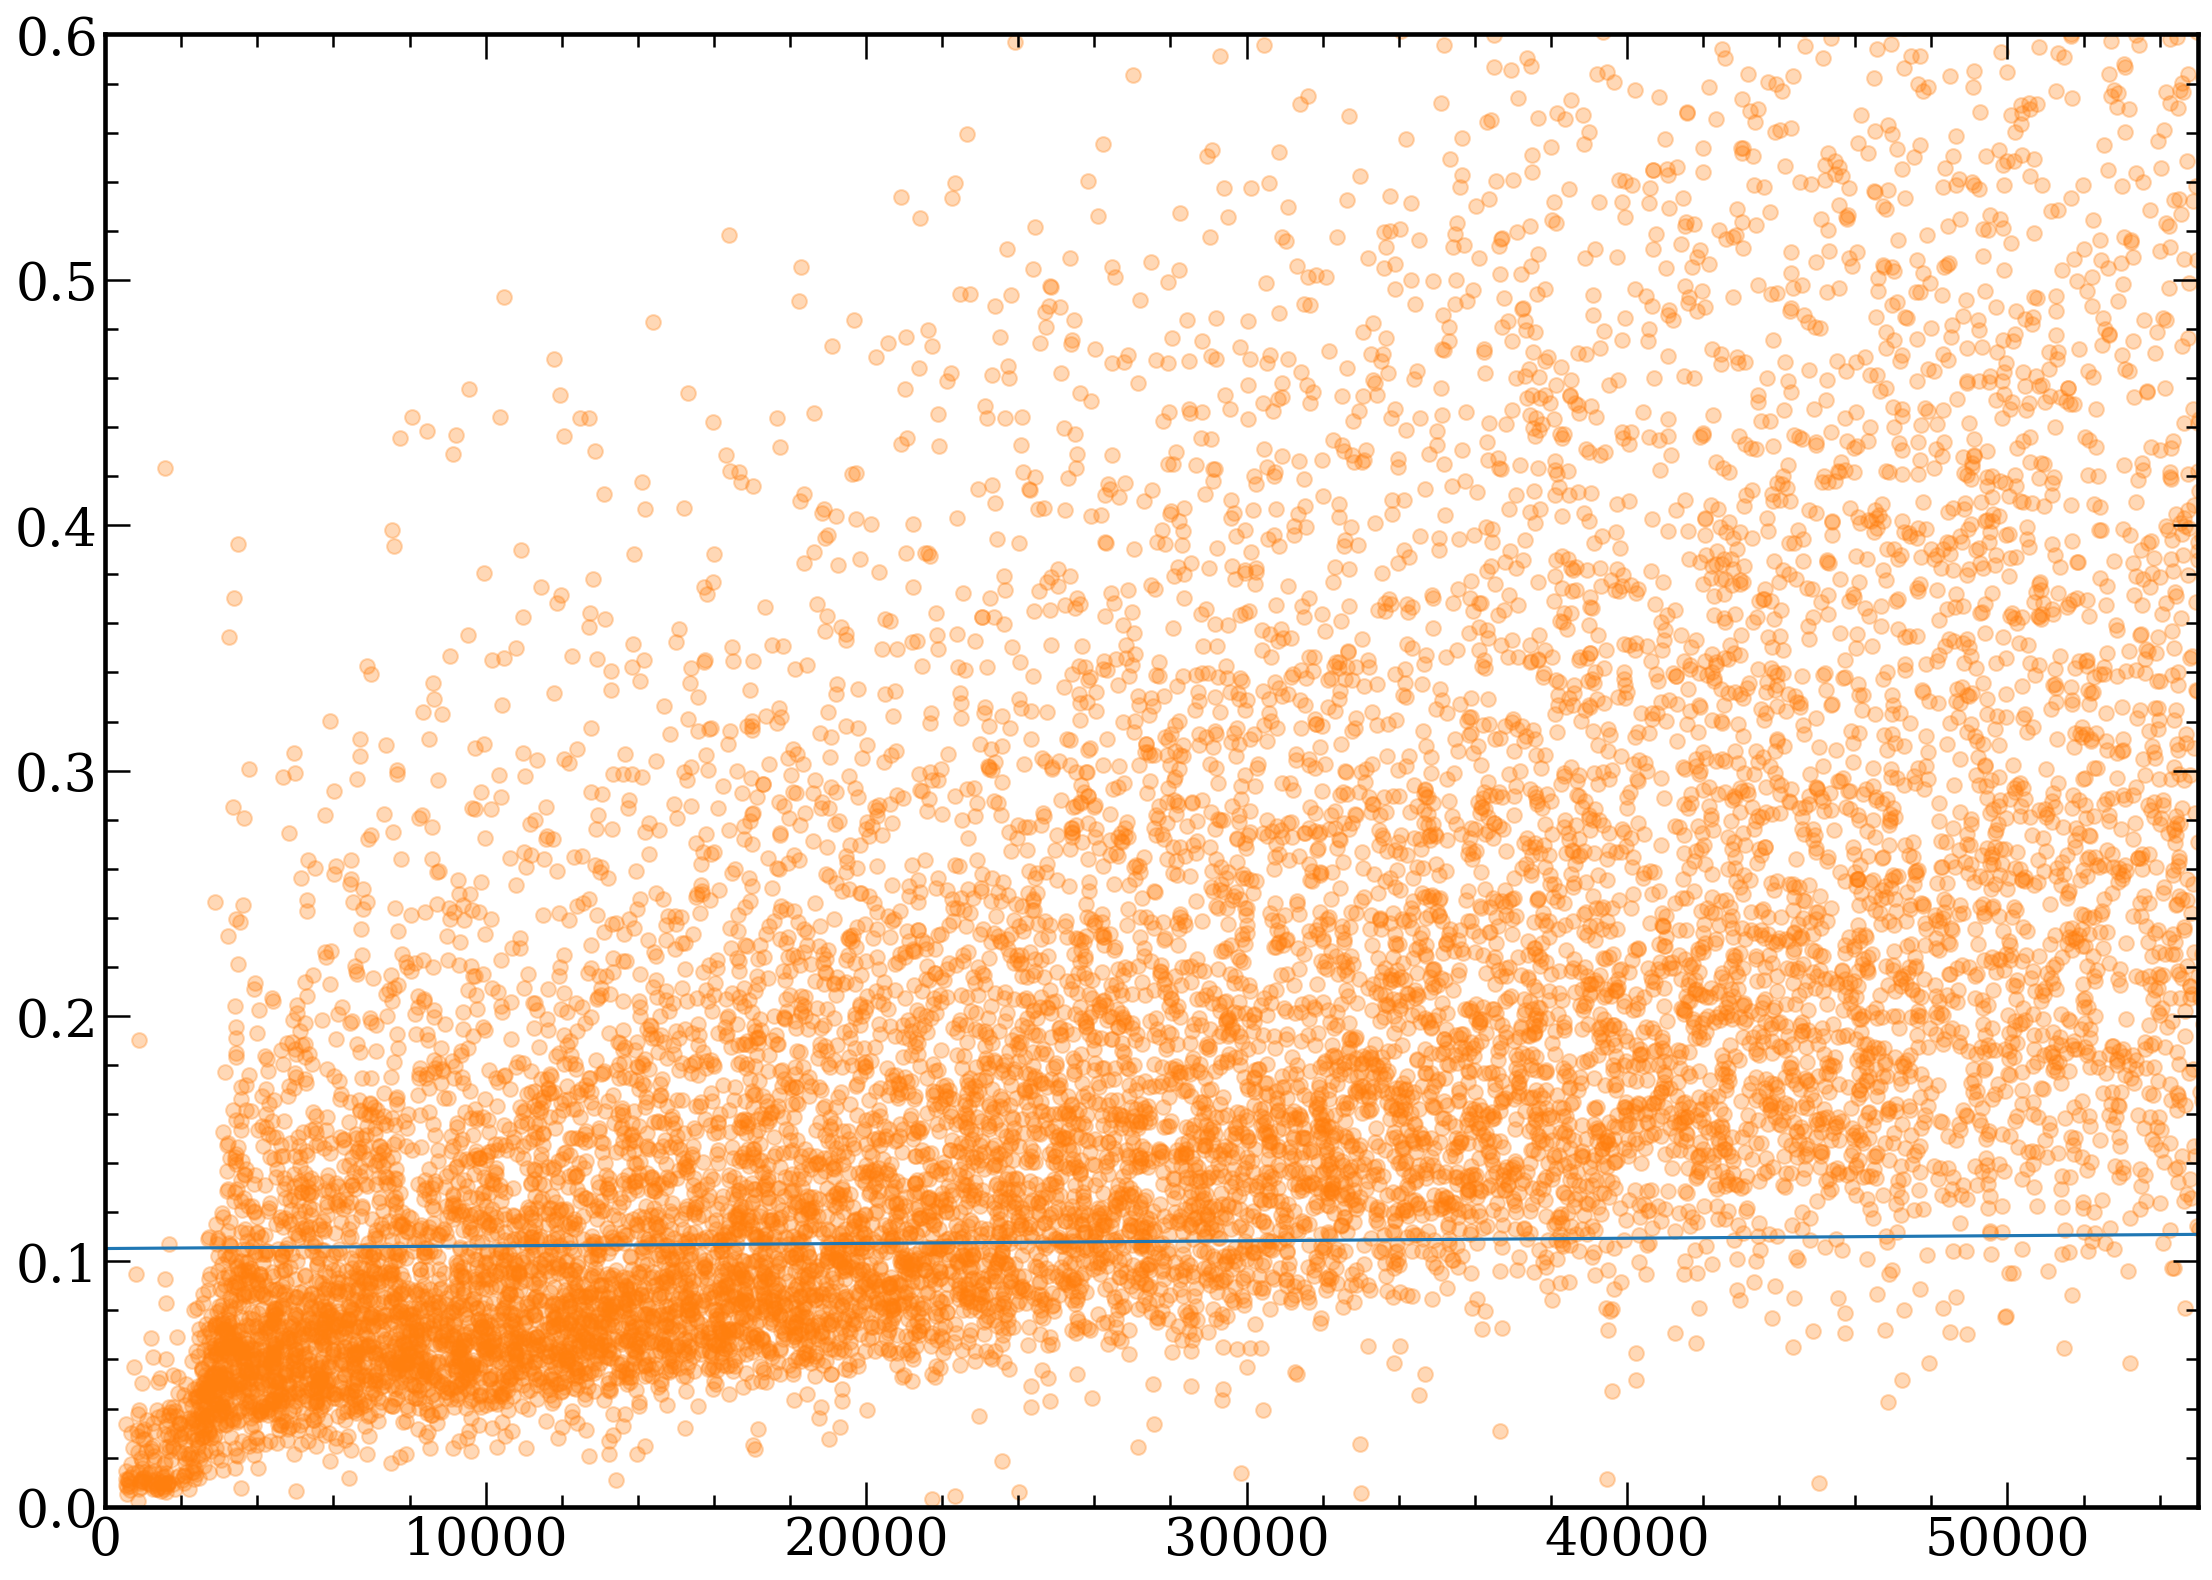

In [97]:
def linear(x,m,c):
    regression = m*x+c
    return regression
p0 = [-3.84825768e-08,0]    
fig=plt.figure(figsize=(18, 13), dpi=150)
time_limit = 55000
# Text options
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Labels
label_size = 25 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20

# Axes Parameters
axes = plt.gca()
axes1.tick_params(axis='both') 

# Axes ---> Linewidth
for axis in ['top','bottom','left','right']:
    axes.spines[axis].set_linewidth(2.2)
    
# Axes ---> Ticks
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)




axes.scatter(kr_s2_drifttime, S1_S2_ratio, marker = 'o', s=50, c = 'C1',alpha = 0.3, label = 'xxx')
#print(kr_s2_drifttime)


x_range = np.linspace(0,time_limit,len(kr_s2_drifttime))
kr_s2_drifttime = np.array(kr_s2_drifttime)
#S1_S2_ratio = list(S1_S2_ratio)
popt, pcov = curve_fit(linear, x_range, S1_S2_ratio, p0=p0, sigma = np.sqrt(S1_S2_ratio))
plt.plot(x_range, linear(x_range, *popt), label = 'bla')



print(popt)
print(type(kr_s2_drifttime))
print(type(S1_S2_ratio))



# linear_fit = np.polyfit(kr_s2_drifttime,S1_S2_ratio,1)
# fit_fn = np.poly1d(linear_fit)
# axes.plot(kr_s2_drifttime, fit_fn(kr_s2_drifttime), '--k')
plt.xlim(0, time_limit)
plt.ylim(0,0.6)
plt.show()